In [1]:
import pandas as pd

# Mensaje de confirmación
print("¡Entorno de Python y notebook listos para la acción!")

# Cargamos los datos desde la carpeta 'data'
# El '../' significa 'sube un nivel en las carpetas' desde 'notebooks' a la raíz del proyecto
df = pd.read_csv('../data/creditcard.csv')

# Mostramos las primeras 5 filas para confirmar que todo cargó correctamente
df.head()

¡Entorno de Python y notebook listos para la acción!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Ver el desbalance de clases (equivalente al nodo Value Counter)
print("Distribución de clases:")
print(df['Class'].value_counts())

Distribución de clases:
Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

# Hacemos una copia para no modificar el dataframe original. Es una buena práctica.
df_proc = df.copy()

# 1. Eliminar la columna 'Time' (equivalente al nodo Column Filter)
df_proc = df_proc.drop('Time', axis=1)

# 2. Normalizar la columna 'Amount' (equivalente al nodo Normalizer)
scaler = StandardScaler() # Creamos nuestro "normalizador"
df_proc['Amount'] = scaler.fit_transform(df_proc['Amount'].values.reshape(-1, 1))

print("\nPreprocesamiento completado. Vista previa de los datos procesados:")
df_proc.head()


Preprocesamiento completado. Vista previa de los datos procesados:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --- 1. Separar las pistas (X) y el objetivo (y) ---
y = df_proc['Class']
X = df_proc.drop('Class', axis=1)

print("--- Datos Separados ---")
print(f"Forma de X (pistas): {X.shape}")
print(f"Forma de y (objetivo): {y.shape}")


# --- 2. Dividir en Entrenamiento y Prueba (Equivalente al nodo Partitioning) ---
# 'stratify=y' es nuestro 'Stratified sampling'
# 'random_state=42' es nuestro 'Fixed random seed'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Datos Divididos ---")
print(f"Tamaño del set de entrenamiento: {len(X_train)} filas")
print(f"Tamaño del set de prueba: {len(X_test)} filas")
print("Distribución de clases en el set de prueba (y_test):")
print(y_test.value_counts())


# --- 3. Balancear SOLO el set de entrenamiento (Equivalente al nodo SMOTE) ---
print("\n--- Aplicando SMOTE ---")
print("Distribución de clases ANTES de SMOTE (y_train):")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribución de clases DESPUÉS de SMOTE (y_train_resampled):")
print(y_train_resampled.value_counts())

--- Datos Separados ---
Forma de X (pistas): (284807, 29)
Forma de y (objetivo): (284807,)

--- Datos Divididos ---
Tamaño del set de entrenamiento: 227845 filas
Tamaño del set de prueba: 56962 filas
Distribución de clases en el set de prueba (y_test):
Class
0    56864
1       98
Name: count, dtype: int64

--- Aplicando SMOTE ---
Distribución de clases ANTES de SMOTE (y_train):
Class
0    227451
1       394
Name: count, dtype: int64

Distribución de clases DESPUÉS de SMOTE (y_train_resampled):
Class
0    227451
1    227451
Name: count, dtype: int64


--- Entrenando el Modelo Base... ---


c:\Users\danie\Documents\Portafolio\deteccion-fraude-tarjeta-credito\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:30:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


¡Modelo Base entrenado!

--- Resultados de la Evaluación (Modelo Base) ---
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     56864
  Fraude (1)       0.76      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962


--- Generando Gráficas para el Modelo Base ---


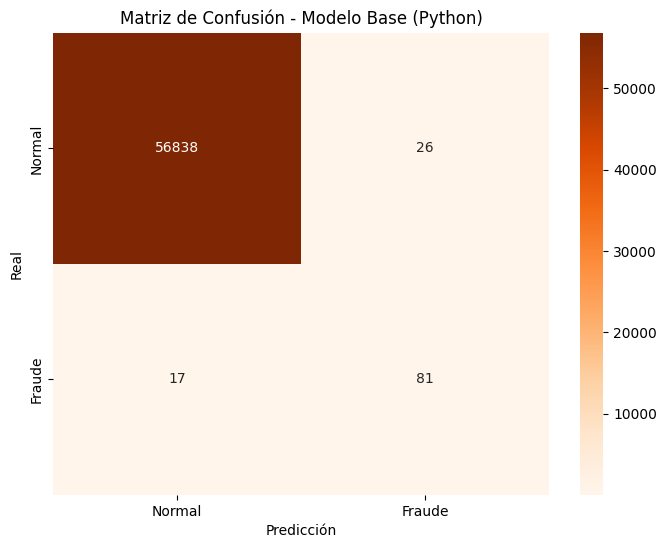

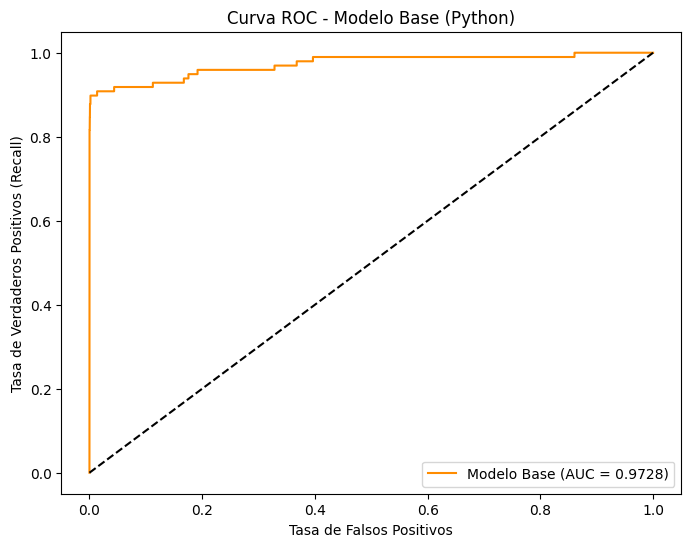

C:\Users\danie\AppData\Local\Temp\ipykernel_6404\1910977466.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_base, palette='Oranges_r')


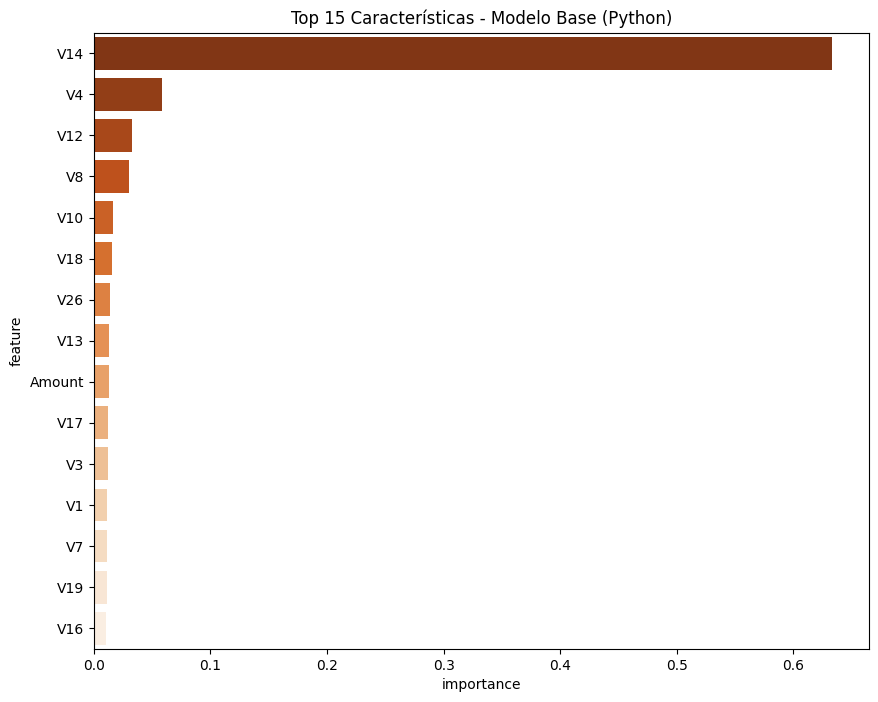

In [5]:
# (Asegúrate de que las librerías como seaborn y matplotlib ya estén importadas al inicio del notebook)
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Crear y entrenar el modelo BASE ---
# (Esta parte es la que ya tenías)
xgb_model_base = XGBClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("--- Entrenando el Modelo Base... ---")
xgb_model_base.fit(X_train_resampled, y_train_resampled)
print("¡Modelo Base entrenado!")

# --- 2. Hacer predicciones y obtener probabilidades para el Modelo BASE ---
y_pred_base = xgb_model_base.predict(X_test)
y_pred_proba_base = xgb_model_base.predict_proba(X_test)[:, 1]

# --- 3. Evaluar el Modelo BASE ---
print("\n--- Resultados de la Evaluación (Modelo Base) ---")
print(classification_report(y_test, y_pred_base, target_names=['Normal (0)', 'Fraude (1)']))


# --- 4. AHORA, LAS GRÁFICAS PARA EL MODELO BASE ---
print("\n--- Generando Gráficas para el Modelo Base ---")

# Gráfica 1: Matriz de Confusión (Heatmap)
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.title('Matriz de Confusión - Modelo Base (Python)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Gráfica 2: Curva ROC
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_base)
auc_base = roc_auc_score(y_test, y_pred_proba_base)
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Modelo Base (AUC = {auc_base:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Modelo Base (Python)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.legend()
plt.show()

# Gráfica 3: Importancia de Características
importances_base = xgb_model_base.feature_importances_
feature_names_base = X.columns # 'X' viene de la celda donde separaste las características
feature_importance_df_base = pd.DataFrame({'feature': feature_names_base, 'importance': importances_base})
feature_importance_df_base = feature_importance_df_base.sort_values('importance', ascending=False).head(15)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df_base, palette='Oranges_r')
plt.title('Top 15 Características - Modelo Base (Python)')
plt.show()

Generando la Curva de Precisión-Recall...


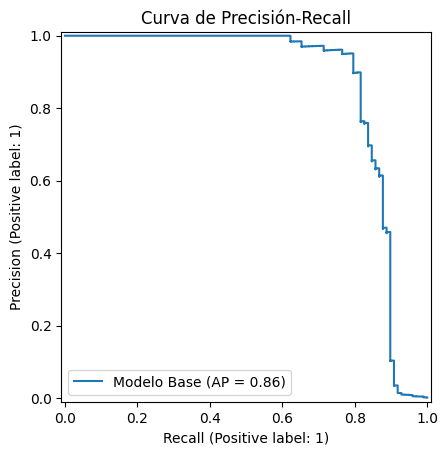

In [8]:
# --- 1. Importar las librerías necesarias ---
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# --- 2. Obtener las probabilidades de la clase positiva (Fraude) ---
# Suponiendo que tu modelo entrenado se llama 'modelo_base' y tus datos de prueba 'X_test'
# Usamos [:, 1] para quedarnos solo con la probabilidad de la clase "1" (Fraude)
y_pred_proba = xgb_model_base.predict_proba(X_test)[:, 1]

# --- 3. Generar y mostrar la curva (Método recomendado y moderno) ---

print("Generando la Curva de Precisión-Recall...")

# Creamos el objeto de la visualización directamente desde las predicciones
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, name="Modelo Base")

# Personalizamos el título y lo mostramos
display.ax_.set_title("Curva de Precisión-Recall")
plt.show()